In [1]:
import numpy as np
import pandas as pd
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Projekt-2_Data.xlsx', sheet_name='Úloha 1')

In [3]:
obs = df["uloha_1 b)_pozorování"].dropna()

In [4]:
df

,uloha_1 a),uloha_1 b)_prior,skupina,uloha_1 b)_pozorování
0,2.0,3.634785,0,3.626656
1,2.0,2.868113,0,3.008269
2,1.0,2.149160,0,2.989829
3,3.0,4.263065,0,2.371630
4,0.0,2.594745,0,4.009366
...,...,...,...,...
99995,NaN,1.725637,9999,NaN
99996,NaN,4.048414,9999,NaN
99997,NaN,3.000662,9999,NaN
99998,NaN,3.058451,9999,NaN


skupina
0       5.021816
1       4.392436
2       5.827102
3       4.531723
4       5.461728
          ...   
9995    5.001767
9996    5.771658
9997    5.579720
9998    5.063841
9999    4.487418
Name: uloha_1 b)_prior, Length: 10000, dtype: float64

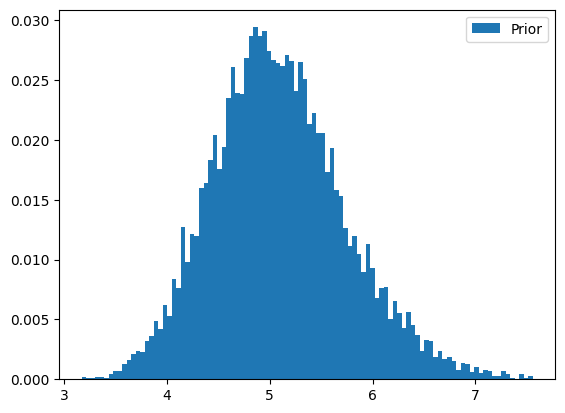

In [5]:
fig, ax = plt.subplots(1, 1)

bins = 100

prior = df["uloha_1 b)_prior"].groupby(df["skupina"]).max()
prior_hist, prior_bins = np.histogram(prior, bins=bins, density=True)
prior_h = prior_hist / prior_hist.sum()
prior_w = prior_bins[1] - prior_bins[0]

ax.bar(prior_bins[:-1], prior_h, width=prior_w, label="Prior")
ax.legend()
prior

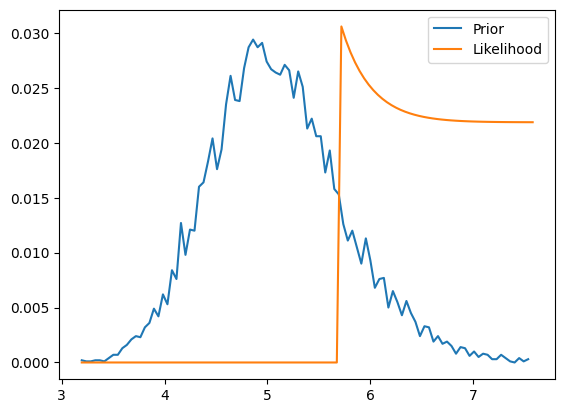

In [6]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(prior_bins[0], prior_bins[-1], bins)  # our parameter b
likelihood = []                                       # our likelihood

for b in x:
    b_truncnorm = (b - 3)
    likelihood.append(truncnorm.pdf(obs, -2, b_truncnorm, 3, 1).prod())
    
likelihood = np.array(likelihood)
likelihood = likelihood / likelihood.sum()

ax.plot(prior_bins[:-1], prior_h, label="Prior")
ax.plot(x, likelihood, label='Likelihood')

ax.legend()

,Prior,Posterior,Likelihood
3.194835,0.0002,0.000000,0.000000
3.239117,0.0001,0.000000,0.000000
3.283400,0.0001,0.000000,0.000000
3.327683,0.0002,0.000000,0.000000
3.371966,0.0002,0.000000,0.000000
...,...,...,...
7.401699,0.0001,0.000491,0.021882
7.445982,0.0000,0.000000,0.021880
7.490264,0.0004,0.001962,0.021878
7.534547,0.0001,0.000490,0.021876


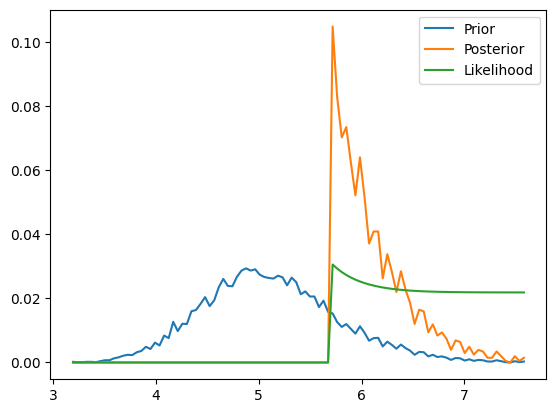

In [7]:
df2 = pd.DataFrame(prior_h, x, columns=["Prior"])
df2["Posterior"] = (prior_h * likelihood) / (prior_h * likelihood).sum()
df2["Likelihood"] = likelihood

# df2.plot(x = df2.index, y = ["Prior", "Likelihood", "Posterior"], kind="bar")
ax = df2.plot()
ax.get_figure().savefig('u1b2.png')
df2

In [14]:
posterior = np.array(df2["Posterior"])

1.0

In [9]:
cumulative_sum = np.cumsum(posterior)
c0 = prior_bins[np.argmax(cumulative_sum > 0.025)]
c1 = prior_bins[np.argmax(cumulative_sum > 0.975) - 1]
print(f"95% conf. interval: {c0} - {c1}")

95% conf. interval: 5.693712028182375 - 6.965070675008921


In [10]:
nonzero = np.argwhere(posterior > 0)
mean = (prior_bins[nonzero].ravel() * posterior[nonzero].ravel()).sum()
median = prior_bins[np.argmax(cumulative_sum > 0.5) - 1]
print(f"mean: {mean}, median = {median}")

mean: 6.073423505273539, median = 5.912911794876607
